In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv(r'C:\Users\Cheng Qiu\Documents\Python Scripts\Data Science\DS take home challenge\DataSet\Conversion Rate\conversion_data.csv')

In [5]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


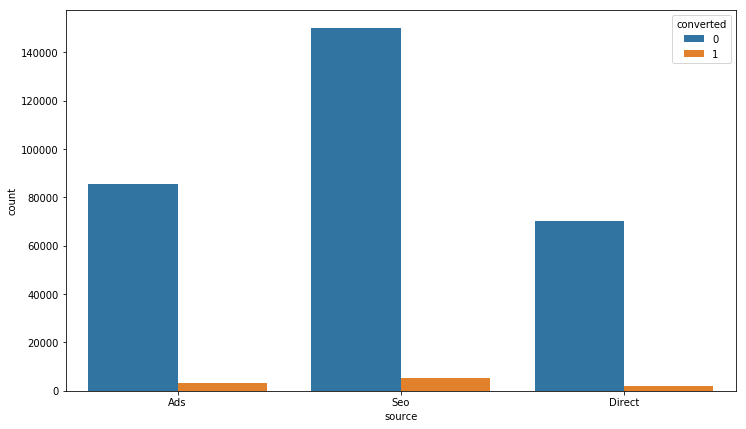

In [15]:
plt.figure(figsize=(12,7))
sns.countplot(x='source',hue='converted',data=df)

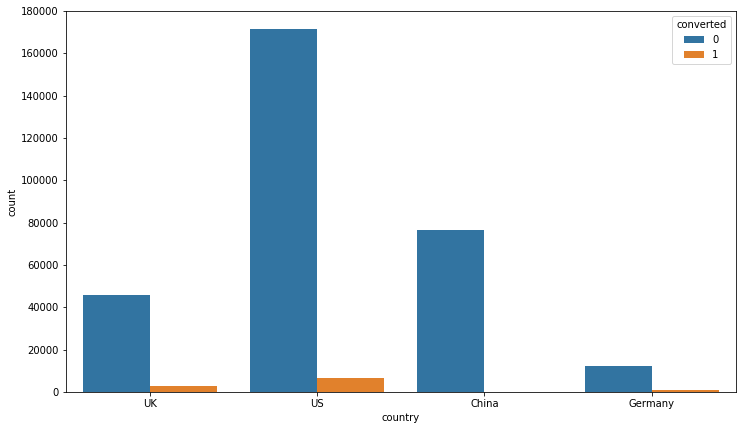

In [16]:
plt.figure(figsize=(12,7))
sns.countplot(x='country',hue='converted',data=df)

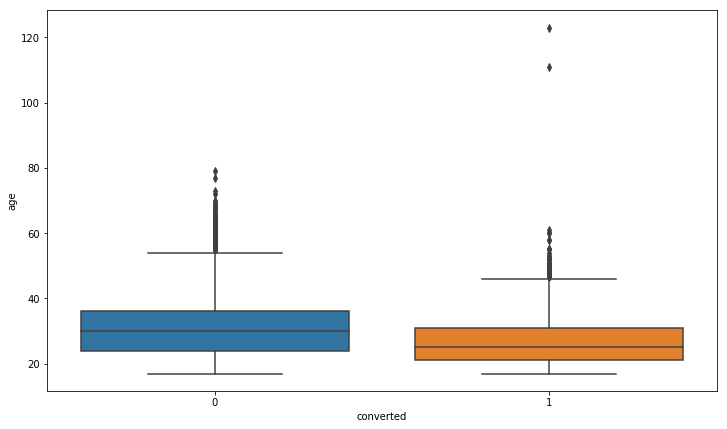

In [23]:
plt.figure(figsize=(12,7))
sns.boxplot(x='converted',y='age',data=df)
## boxplot shows younger ppl more likely to convert 

In [24]:
df = df[df['age'] < 100]
#remove outlier

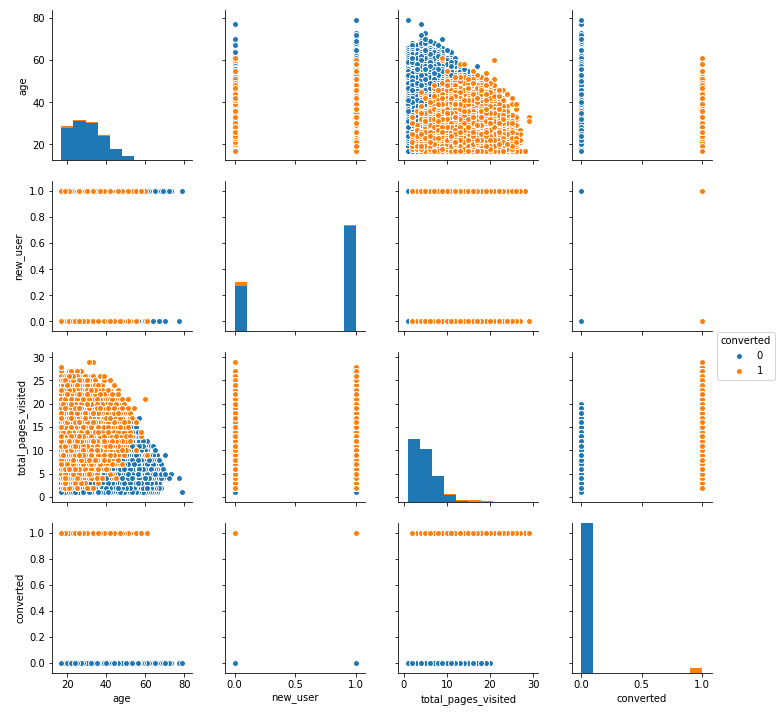

In [27]:
sns.pairplot(df, hue = "converted")

In [37]:
df.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

In [92]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score



In [97]:
X = df.drop('converted', axis=1)
y = df['converted']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2)

X_train3, X_test3, y_train3, y_test3 = train_test_split(df.drop('converted', axis =1), df['converted'])

In [100]:
logreg2 = LogisticRegression(solver = "lbfgs")

categorical= ['country','source','new_user']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(sparse=False))])

numerical =['age','total_pages_visited']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical),
        ('cat', categorical_transformer, categorical)])

ct = ColumnTransformer([('oh_enc', OneHotEncoder(sparse=False), [0, 3]),])

#ct = ColumnTransformer(transformers = [('oh_enc', OneHotEncoder(sparse=False), categorical)])



In [83]:
X_train2.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
dtype: object

In [101]:
#clf = Pipeline(steps=[('preprocessor', preprocessor),
#                      ('classifier', logreg2)])


clf = Pipeline(steps=[('preprocessor', ct),
                      ('classifier', logreg2)])

clf.fit(X_train3, y_train3)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('oh_enc',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 3])])),
                ('classifier', LogisticRegression())])

In [102]:
clf.score(X_test2, y_test2)

0.9683744465528147

In [18]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

In [57]:
df2= pd.get_dummies(df)
df2.head()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1


In [58]:
X_Train, X_test, y_train, y_test = train_test_split(df2.drop('converted', axis =1), df2['converted'])

In [62]:
X_Train.head()

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
56955,19,1,9,0,0,0,1,0,1,0
6024,40,0,7,1,0,0,0,1,0,0
46042,17,0,7,0,0,0,1,0,0,1
203062,21,0,17,0,0,0,1,0,1,0
78578,50,1,5,0,0,0,1,0,1,0


In [59]:
logreg = LogisticRegression(solver = "lbfgs")
logreg.fit(X_Train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
np.set_printoptions(suppress=True)
np.round(logreg.coef_,5)

## Positive traits of conversion- Young, past_user, higher page visited,germany uk, us(not as good)
## recommendations for increasing converstion: Targeting young users who has visited site before with high total page visited 
## from Germany and US. 

array([[-0.07355, -1.74355,  0.75332, -2.60569,  1.04156,  0.9485 ,
         0.56804,  0.0623 , -0.11117,  0.00129]])

In [67]:
#Prediction 

logreg.score(X_test, y_test)



0.986729917773561